=======================================================================================

# TP de Statistique Bayésienne

# Version étudiant
=======================================================================================

Dans ce TP, nous allons mettre en place quelques procédures de calcul bayésien dans 
un cas conjugué : la loi du posterior appartient à la même classe que la loi du prior

In [10]:
%matplotlib notebook
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from scipy import stats

## Loi exponentielle (modèle de durée de vie)

Définir une fonction, prenant comme arguments *(a,n,lambda0,lambda1)*, qui : 
- simule n données de loi exponentielle *E(lambda0)*
- trace la vraisemblance sur l'axe des lambda 
- trace sur ce même axe une densité a priori de loi **gamma G(a,b)** pour lambda, en fixant l'espérance de cette loi a lambda1
- trace sur ce même axe la densité a posteriori de lambda

Modifiez les paramètres d'entrée ; comment évolue la loi a posteriori vis-à-vis de la vraisemblance et de la loi a priori ?

Quel sens pouvons-nous donner aux hyperparamètres **a** et **b** ? 

Faites tendre **a** et **b** vers 0. Que se passe-t-il ? 

In [ ]:
# La loi a posteriori est donc une Gamma(a+n, b+sum(X))

In [29]:
# Calcul de la vraisemblance (theta=lambda)
def lik_expo(X,theta):
    n = len(X)
    res = np.exp(n*np.log(theta) - theta*np.sum(X))
    return res

In [23]:
# Densité a priori sur theta = lambda
from scipy.stats import gamma
def prior(theta,a,b):
    res = gamma.pdf(theta,a,scale=1/b)
    return res

In [73]:
# Densité a priori sur theta = lambda
def posterior(theta,a,b,X):
    n = len(X)
    res = gamma.pdf(theta,a+n,scale=1/(b+np.sum(X)))
    # Espérance = estimateur quadratique = (a+n)/(b+sum(X))
    return(res)

In [78]:

def calcul_post(n,a,lambda0,lambda1):
    # Simulation de l'échantillon
    X = np.random.exponential(1/lambda0,n)
    
    # Calcul de b car E[lambda] a priori = a/b = lambda1
    b = a/lambda1
    
    # Plots de la vraisemblance comme fonction de lambda (= theta), du prior et du posterior
    x = np.linspace(0.000001,10*lambda0) # valeurs de lambda
    y1=lik_expo(X,x)
    y2=prior(x,a,b)
    y3=posterior(x,a,b,X)
    
    figure = pl.figure(figsize = (5, 6))
   # pl.step(x, y1,label="Vraisemblance")
    pl.step(x, y2,label="Prior")
    pl.step(x, y3,label="Posterior")
    pl.xlabel('lambda')
    pl.legend()
    pl.show()
    

<IPython.core.display.Javascript object>


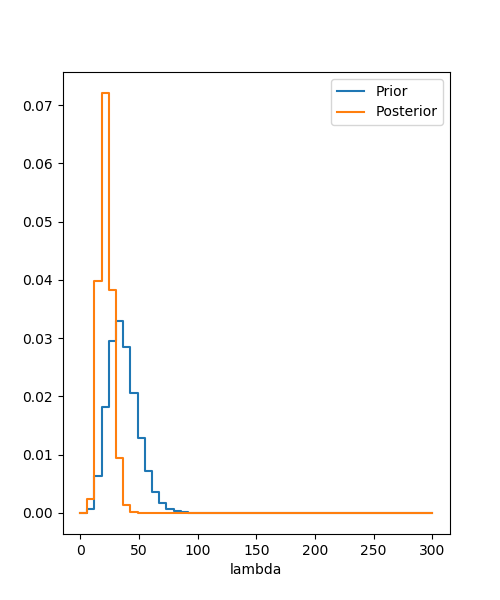

In [83]:
# Essai
calcul_post(10,10,30,40)
